In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Funciones

In [44]:
def make_confusion_matrix(cf, group_names = None, categories = 'auto', count = True, percent = True,
                          cbar = True, xyticks = True, xyplotlabels = True, sum_stats = True,
                          figsize = None, cmap = 'Blues', title = None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize == None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks == False:
        #Do not show categories if xyticks is False
        categories = False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize = figsize)
    sns.heatmap(cf, annot = box_labels, fmt = "", cmap = cmap, cbar = cbar, xticklabels = categories,
                yticklabels = categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [24]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize = (8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc ='best')

#### Descarga de datos

In [2]:
df = pd.read_csv('reviews_preprocessed.csv')

In [3]:
df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,text_processed
0,0,1881509818,"[0, 0]",5,This came in on time and I am veru happy with ...,"01 26, 2014",AIXZKN4ACSKI,David Briner,Woks very good,1390694400,came time veru happy haved used already makes ...
1,1,1881509818,"[1, 1]",5,I had a factory Glock tool that I was using fo...,"02 2, 2012",A1L5P841VIO02V,Jason A. Kramer,Works as well as the factory tool,1328140800,factory glock tool using glock 26 27 17 since ...
2,2,1881509818,"[2, 2]",4,If you don't have a 3/32 punch or would like t...,"02 28, 2012",AB2W04NI4OEAD,J. Fernald,"It's a punch, that's all.",1330387200,3 32 punch would like one glock bag okay butt ...
3,3,1881509818,"[0, 0]",4,This works no better than any 3/32 punch you w...,"02 5, 2012",A148SVSWKTJKU6,"Jusitn A. Watts ""Maverick9614""",It's a punch with a Glock logo.,1328400000,works no better 3 32 punch would find hardware...
4,4,1881509818,"[0, 0]",4,I purchased this thinking maybe I need a speci...,"04 23, 2013",AAAWJ6LW9WMOO,Material Man,"Ok,tool does what a regular punch does.",1366675200,purchased thinking maybe need special tool eas...


In [4]:
df = df[['text_processed', 'overall']]

In [5]:
df.head()

,text_processed,overall
0,came time veru happy haved used already makes ...,5
1,factory glock tool using glock 26 27 17 since ...,5
2,3 32 punch would like one glock bag okay butt ...,4
3,works no better 3 32 punch would find hardware...,4
4,purchased thinking maybe need special tool eas...,4


In [6]:
df.isna().sum()

text_processed    128
overall             0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
def label_sentiment(row):
    if int(row['overall']) < 3:
        return 1
    else:
        return 0

In [9]:
df['label'] = df.apply(lambda row: label_sentiment(row), axis = 1)

In [10]:
df.head()

,text_processed,overall,label
0,came time veru happy haved used already makes ...,5,0
1,factory glock tool using glock 26 27 17 since ...,5,0
2,3 32 punch would like one glock bag okay butt ...,4,0
3,works no better 3 32 punch would find hardware...,4,0
4,purchased thinking maybe need special tool eas...,4,0


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['text_processed'],
    df['label'],
    train_size = 0.7,
    test_size = 0.3,
    random_state = 17,
    shuffle = True
)

In [12]:
print("X_train number of rows: " + str(X_train.shape[0]))
print("y_train number of rows: " + str(y_train.shape[0]))
print("X_test number of rows: " + str(X_test.shape[0]))
print("y_test number of rows: " + str(y_test.shape[0]))

X_train number of rows: 207346
y_train number of rows: 207346
X_test number of rows: 88863
y_test number of rows: 88863


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer(
    max_df = 0.95,
    min_df = 5,
    max_features = 2500,
    strip_accents = 'ascii',
    ngram_range = (1, 3)
)
cv.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=2500, min_df=5,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents='ascii', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

Durante el entrenamiento del Vectorizer se van a eliminar aquellas palabras que aparezcan en menos de 5 documentos, y aquellas palabras que aparezcan en más del 95% de ellos, ya que entendemos que si aparecen tanto o tan poco, no deben ser relevantes y no aportarán nada al modelo.

Para el vocabulario se van a considerar las 2500 palabras que tengan mayor frecuencia.

In [14]:
print(list(cv.vocabulary_.items())[:20])

[('put', 1681), ('feet', 726), ('work', 2426), ('become', 216), ('socks', 2001), ('super', 2115), ('great', 895), ('knife', 1106), ('sharp', 1900), ('blade', 251), ('sturdy', 2109), ('full', 825), ('size', 1962), ('even', 656), ('though', 2192), ('pocket', 1582), ('clip', 415), ('not', 1393), ('really', 1717), ('meant', 1283)]


In [15]:
print(len(cv.vocabulary_))

2500


In [16]:
X_train_ = cv.transform(X_train)
X_test_ = cv.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegressionCV

c = [0.01, 0.1, 1, 10, 100]

lr = LogisticRegressionCV(
    Cs = c,
    cv = 5,
    solver = 'sag',
    max_iter = 500,
    class_weight = 'balanced',
    random_state = 17)

In [18]:
lr.fit(X_train_, y_train)

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10, 100], class_weight='balanced',
           cv=5, dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=500, multi_class='ovr', n_jobs=1, penalty='l2',
           random_state=17, refit=True, scoring=None, solver='sag',
           tol=0.0001, verbose=0)

In [77]:
print("Score train set: " + str(lr.score(X_train_, y_train)))
print("Score test set: " + str(lr.score(X_test_, y_test)))

Score train set: 0.8622061674688685
Score test set: 0.8606506645060373


In [21]:
y_test_predict = lr.predict(X_test_)
y_test_predict_probs = lr.predict_proba(X_test_)[:, 1]

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve

conf_mat = confusion_matrix(y_test, y_test_predict)

print('Confussion matrix:\n{}'.format(conf_mat))
print('\nClassification report:\n{}'.format(classification_report(y_test, y_test_predict)))
print('Accuracy score:{}'.format(accuracy_score(y_test, y_test_predict)))

Confussion matrix:
[[71329 11783]
 [  947  4804]]

Classification report:
             precision    recall  f1-score   support

          0       0.99      0.86      0.92     83112
          1       0.29      0.84      0.43      5751

avg / total       0.94      0.86      0.89     88863

Accuracy score:0.8567457772076117


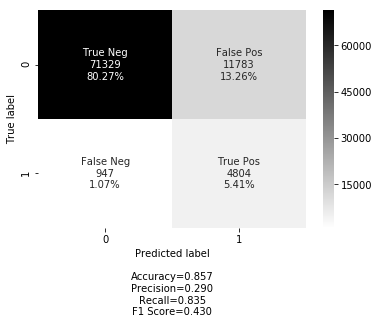

In [51]:
labels = ['True Neg','False Pos','False Neg', 'True Pos']
categories = [0, 1]
make_confusion_matrix(conf_mat, group_names = labels, categories = categories, cmap = 'binary')

In [23]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_test, y_test_predict_probs)

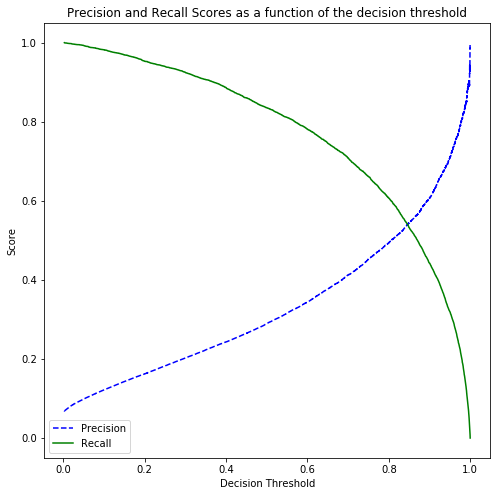

In [25]:
plot_precision_recall_vs_threshold(p, r, thresholds)

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [27]:
gb.fit(X_train_, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [76]:
print("Score train set: " + str(gb.score(X_train_, y_train)))
print("Score test set: " + str(gb.score(X_test_, y_test))) 

Score train set: 0.9426369450097905
Score test set: 0.9406614676524537


In [30]:
test_predict = gb.predict(X_test_)
test_predict_probs = gb.predict_proba(X_test_)[:, 1]

In [49]:
cf_matrix = confusion_matrix(y_test, test_predict)
print('Confussion matrix:\n{}'.format(cf_matrix))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
print('Accuracy score:{}'.format(accuracy_score(y_test, test_predict)))

Confussion matrix:
[[82867   245]
 [ 5028   723]]

Classification report:
             precision    recall  f1-score   support

          0       0.94      1.00      0.97     83112
          1       0.75      0.13      0.22      5751

avg / total       0.93      0.94      0.92     88863

Accuracy score:0.9406614676524537


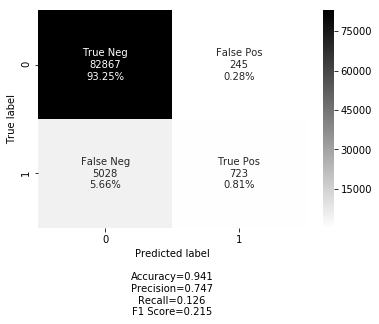

In [52]:
make_confusion_matrix(cf_matrix, group_names = labels, categories = categories, cmap = 'binary')

In [32]:
precision, recall, threshold = precision_recall_curve(y_test, test_predict_probs)

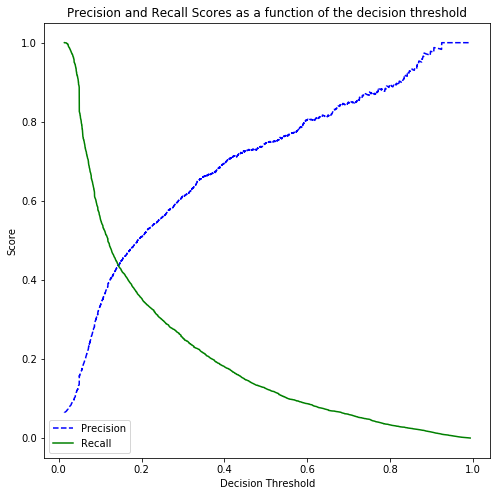

In [33]:
plot_precision_recall_vs_threshold(precision, recall, threshold)

Teniendo en cuenta los dos modelos evaluados, y, a pesar de que el F1-Score medio es mejor en el GradientBoosting, esto está sesgado por el hecho de que tienen un recall del 1.00 y, en general, muy buenas métricas en las reviews positivas; por lo que, al ser un problema desbalanceado, nos da una métrica sesgada.
Debido a eso, vamos a seleccionar Logistic Regression, ya que tiene mejores métricas en las reviews negativas.

Una vez seleccionado el modelo, es importante reentrenar el modelo con todos los datos, tanto los del conjunto de train como los de test.

In [68]:
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])
X_ = cv.transform(X)

In [72]:
lr.fit(X_, y)

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_

LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10, 100], class_weight='balanced',
           cv=5, dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=500, multi_class='ovr', n_jobs=1, penalty='l2',
           random_state=17, refit=True, scoring=None, solver='sag',
           tol=0.0001, verbose=0)

In [75]:
print("Score set: " + str(lr.score(X_, y)))

Score set: 0.8617395150046082


In [78]:
y_predict = lr.predict(X_)
y_predict_probs = lr.predict_proba(X_)[:, 1]

In [79]:
conf_matrix = confusion_matrix(y, y_predict)
print('Confussion matrix:\n{}'.format(conf_matrix))
print('\nClassification report:\n{}'.format(classification_report(y, y_predict)))
print('Accuracy score:{}'.format(accuracy_score(y, y_predict)))

Confussion matrix:
[[238439  38537]
 [  2417  16816]]

Classification report:
             precision    recall  f1-score   support

          0       0.99      0.86      0.92    276976
          1       0.30      0.87      0.45     19233

avg / total       0.95      0.86      0.89    296209

Accuracy score:0.8617395150046082


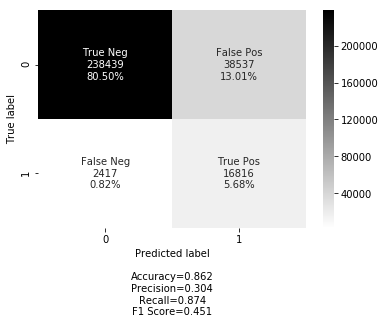

In [80]:
make_confusion_matrix(conf_matrix, group_names = labels, categories = categories, cmap = 'binary')

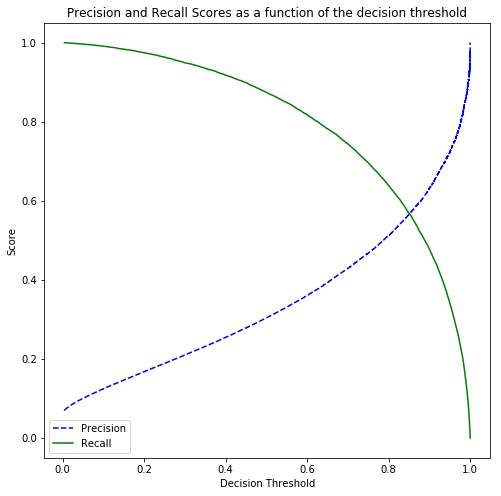

In [81]:
prec, rec, thold = precision_recall_curve(y, y_predict_probs)
plot_precision_recall_vs_threshold(prec, rec, thold)